<a href="https://colab.research.google.com/github/masfudindc/PCVK/blob/main/Week03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCVK**
## WEEK 03

## Masfudin Dwi Cahyo (2141720010)
## TI-3D

### Kelompok 3
#####1. Aura Sagita Ashilah  (2141720102)

#####2. Bryan toshin Saputro (2141720220)

#####3. Masfudin Dwi Cahyo   (2141720010)

-

**PRAKTIKUM**

Akses folder image pada drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


-

import library openCV, numpy, matplotlib

In [19]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

-

 Melakukan transformasi linier brightness dengan memasukkan nilai konstanta tertentu dan
menghasilkan warna. Seperti yang telah dibahas pada ulasan teori, formula untuk melakukan
transformasi linier brightness adalah sebagai berikut:


𝑔(𝑥, 𝑦) = 𝑓(𝑥, 𝑦) + 𝑏


dimana g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, dan b adalah
nilai brightness.


-

Transformasi Linier Brightness

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 155


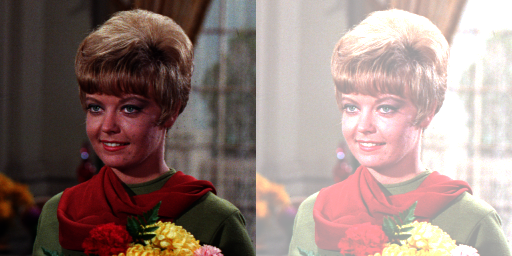

In [9]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Week03/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
      for c in range(original.shape[2]):
        brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

-

**TUGAS PRAKTIKUM**

-

1. **Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:**

Inverse Citra
--------------------------------


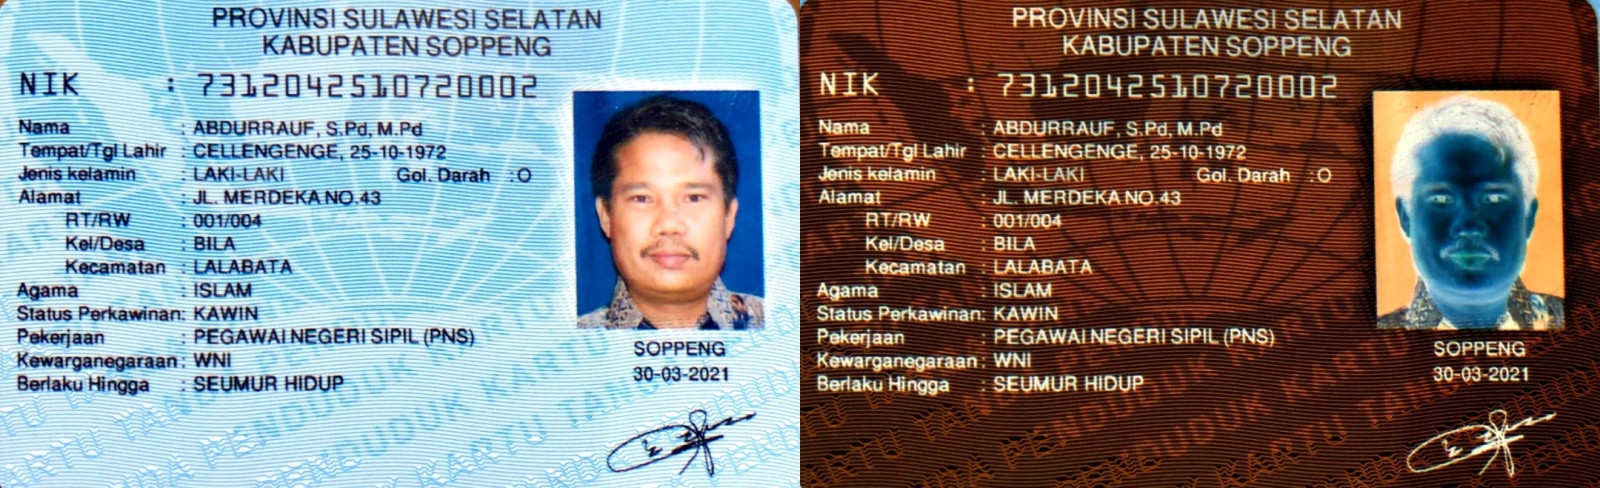

In [23]:
print('Inverse Citra')
print('--------------------------------')

#membaca citra sebagai array numpy
original = cv.imread('/content/drive/MyDrive/PCVK/Week03/contoh_ktp.jpeg')

#menghitung citra negatif/inverse dengan rumus g(x) = 255 - f(x)
inverse_image = 255 - original

#menampilkan citra asli dan inverse
final_frame = cv.hconcat((original, inverse_image))
cv2_imshow(final_frame)

-

2. **Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:**

Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan tingkat kecerahan (-255 - 255): 50
Masukkan tingkat kontras (1.0 - 3.0): 2


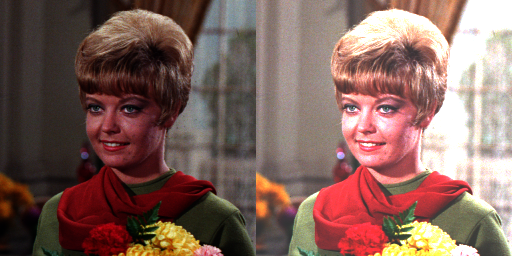

In [31]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan (-255 - 255): '))
except ValueError:
  print('Error, not a number')

try:
  contrast = int(input('Masukkan tingkat kontras (1.0 - 3.0): '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Week03/female.tiff')

#mengubah kontras dan kecerahan dengan rumus
contrast_image = cv.convertScaleAbs(original, alpha=contrast, beta=brightness)

#menampilkan citra asli dan hasil
final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

-

Tanpa convertScaleAbs

Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan tingkat kecerahan (-255 - 255): 50
Masukkan tingkat kontras (1.0 - 3.0): 2


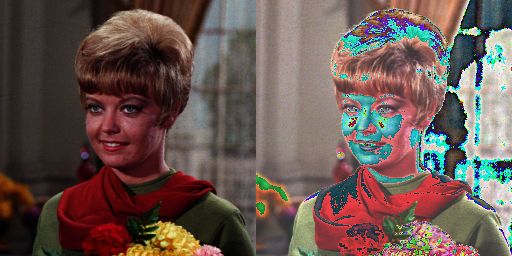

In [30]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan (-255 - 255): '))
except ValueError:
  print('Error, not a number')

try:
  contrast = int(input('Masukkan tingkat kontras (1.0 - 3.0): '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Week03/female.tiff')

#mengubah kontras dan kecerahan dengan operasi aritmatika
contrast_image = original * contrast + brightness

#memastikan  nilai piksel berasa dalam rentang 0-255 (8 bit)
contrast_image = np.clip(contrast_image, 0, 255).astype(np.uint8)

#menampilkan citra asli dan hasil
final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

-

3. **Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:**

Mengubah citra dengan transformasi logarithmic brightness
--------------------------------------------


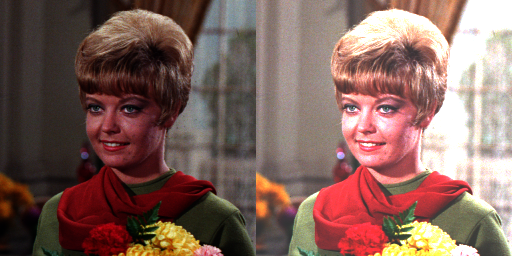

In [32]:
print('Mengubah citra dengan transformasi logarithmic brightness')
print('--------------------------------------------')

original = cv.imread('/content/drive/MyDrive/PCVK/Week03/female.tiff')

#mengubah citra menggunakan rumus s = c * log(1+r)

#mengubah citra ke grayscale (r)
gray_image = cv.cvtColor(original, cv.COLOR_BGR2GRAY)

#menghitung nilai konstanta (c)
c = 255 / np.log(1 + np.max(gray_image))

#menghitung nilai piksel baru dengan fungsi logaritma (s)
log_image = c * np.log(1 + gray_image)

#memastikan nilai piksel berada dalam rentang 0-255 (8 bit)
log_image = np.clip(log_image, 0, 255).astype(np.uint8)

#menampilkan citra asli dan hasil
final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

-

4. **Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:**

Mengubah citra dengan transformasi grayscale menggunakan metode averaging, lightness, dan luminance
--------------------------------------------


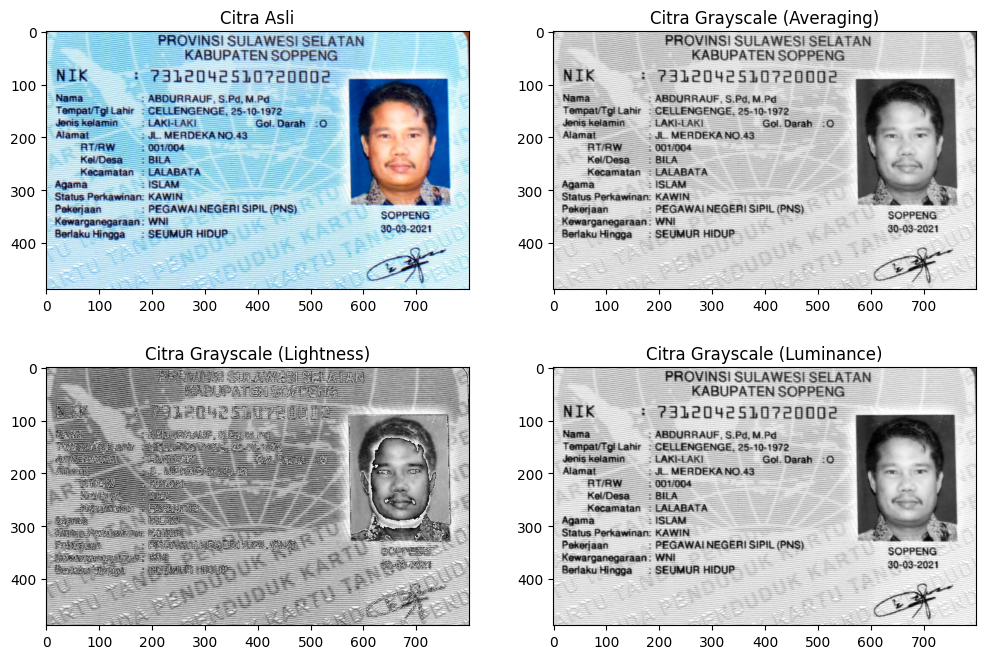

In [40]:
print('Mengubah citra dengan transformasi grayscale menggunakan metode averaging, lightness, dan luminance')
print('--------------------------------------------')

original = cv.imread('/content/drive/MyDrive/PCVK/Week03/contoh_ktp.jpeg')

#mengubah citra ke RGB
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)

#menghitung nilai piksel baru dengan metode averaging
averaging_ktp = np.mean(original, axis=2)

#menghitung nilai piksel baru dengan metode lightness
min_ktp = np.min(original, axis=2)
max_ktp = np.max(original, axis=2)
lightness_ktp = (min_ktp + max_ktp) / 2

#menghitung nilai piksel baru dengan metode luminance
luminance_ktp = 0.21 * original[:,:,0] + 0.72 * original[:,:,1] + 0.07 * original[:,:,2]

#menampilkan citra asli dan hasil
plt.figure(figsize=(12, 8))   #Fungsi plt.figure adalah untuk membuat sebuah objek figure, yaitu wadah untuk menampilkan satu atau lebih subplot. Fungsi ini dapat menerima beberapa argumen, salah satunya adalah figsize yang menentukan ukuran figure dalam inci.
plt.subplot(221)    #Fungsi plt.subplot adalah untuk membuat sebuah objek axes, yaitu area untuk menampilkan plot. Fungsi ini menerima tiga argumen, yaitu nrows, ncols, dan index yang menentukan posisi subplot dalam grid. Pada plt.subplot(221) berarti membuat subplot di posisi pertama dari grid 2x2.
plt.imshow(original)
plt.title('Citra Asli')
plt.subplot(222)
plt.imshow(averaging_ktp, cmap='gray')
plt.title('Citra Grayscale (Averaging)')
plt.subplot(223)
plt.imshow(lightness_ktp, cmap='gray')
plt.title('Citra Grayscale (Lightness)')
plt.subplot(224)
plt.imshow(luminance_ktp, cmap='gray')
plt.title('Citra Grayscale (Luminance)')
plt.show()

-

5. **Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:**

Dalam kasus ini, langkah-langkah yang perlu dikerjakan yaitu:

1. Membaca citra masukan sebagai array numpy dengan OpenCV.
2. Mengubah citra masukan ke ruang warna HSV dengan fungsi cv.cvtColor.
3. Membuat mask untuk menyeleksi piksel-piksel yang berwarna biru dengan fungsi cv.inRange.
4. Mengubah citra masukan ke grayscale dengan fungsi cv.cvtColor.
5. Menggabungkan citra grayscale dengan mask biru dengan fungsi cv.bitwise_and.

Mengubah citra dengan transformasi grayscale menggunakan metode averaging, lightness, dan luminance
--------------------------------------------


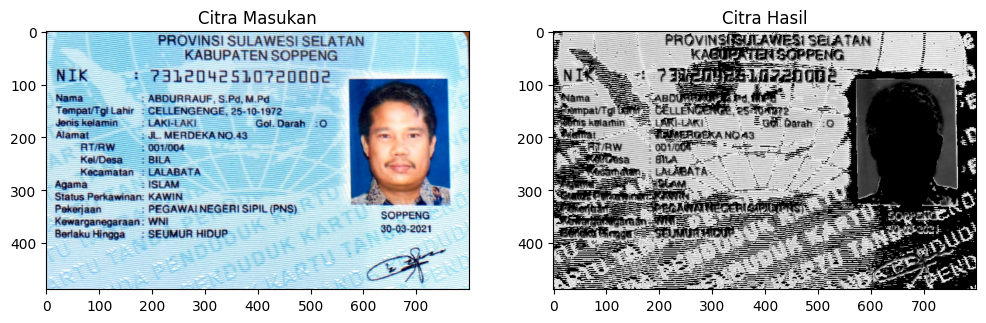

In [41]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt


print('Menampilkan warna biru pada citra masukan dan mengubah bagian lain yang tidak berwarna biru menjadi grayscale')
print('--------------------------------------------')

original = cv.imread('/content/drive/MyDrive/PCVK/Week03/contoh_ktp.jpeg')

#mengubah citra ke HSV dengan fungsi cv.cvtColor
hsv_image = cv.cvtColor(original, cv.COLOR_BGR2HSV)

#membuat mask untuk warna biru dengan fungsi cv.inRange
lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])
mask_blue = cv.inRange(hsv_image, lower_blue, upper_blue)

#mengubah citra ke grayscale dengan fungsi cv.cvtColor
grayscale_image = cv.cvtColor(original, cv.COLOR_BGR2GRAY)

#menggabungkan citra grayscale dengan mask biru dengan fungsi cv.bitwise_and
result_image = cv.bitwise_and(grayscale_image, grayscale_image, mask=mask_blue)

#menampilkan citra asli dan hasil
plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.title('Citra Masukan')
plt.subplot(122)
plt.imshow(result_image, cmap='gray')
plt.title('Citra Hasil')
plt.show()

Menampilkan warna biru pada citra masukan dan mengubah bagian lain yang tidak berwarna biru menjadi grayscale
--------------------------------------------


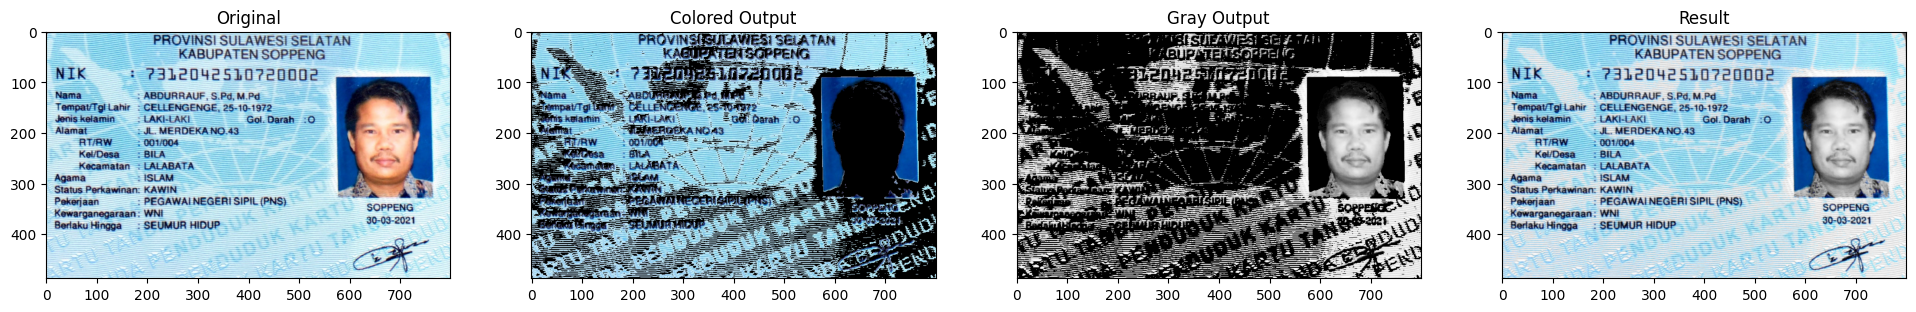

In [54]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt


print('Menampilkan warna biru pada citra masukan dan mengubah bagian lain yang tidak berwarna biru menjadi grayscale')
print('--------------------------------------------')


original = cv.imread('/content/drive/MyDrive/PCVK/Week03/contoh_ktp.jpeg')

# Ubah gambar dari BGR ke RGB
img_rgb = cv.cvtColor(original, cv.COLOR_BGR2RGB)

# Ubah gambar ke grayscale dan gabungkan channelnya
gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
gray = cv.merge([gray, gray, gray])

# Ubah gambar ke ruang warna HSV
hsv = cv.cvtColor(original, cv.COLOR_BGR2HSV)

# Tentukan batas untuk warna biru dalam ruang warna HSV
lower = np.array([90, 50, 50])
upper = np.array([130, 255, 255])

# Buat mask untuk warna biru
mask = cv.inRange(hsv, lower, upper)

# Ambil bagian biru dari gambar
colored_output = cv.bitwise_and(original, original, mask=mask)

# Ubah bagian non-biru menjadi grayscale
gray_output = cv.bitwise_and(gray, gray, mask=255-mask)

# Gabungkan bagian biru
result = cv.add(colored_output, gray_output)

# Tampilkan gambar menggunakan matplotlib
plt.figure(figsize=(24, 16))

plt.subplot(1, 4, 1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.title('Original')

plt.subplot(1, 4, 2)
plt.imshow(cv.cvtColor(colored_output, cv.COLOR_BGR2RGB))
plt.title('Colored Output')

plt.subplot(1, 4, 3)
plt.imshow(cv.cvtColor(gray_output, cv.COLOR_BGR2RGB))
plt.title('Gray Output')

plt.subplot(1, 4, 4)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Result')

plt.show()

-

**Tambahan**

Menampilkan warna merah pada citra masukan dan mengubah bagian lain yang tidak berwarna biru menjadi grayscale
--------------------------------------------


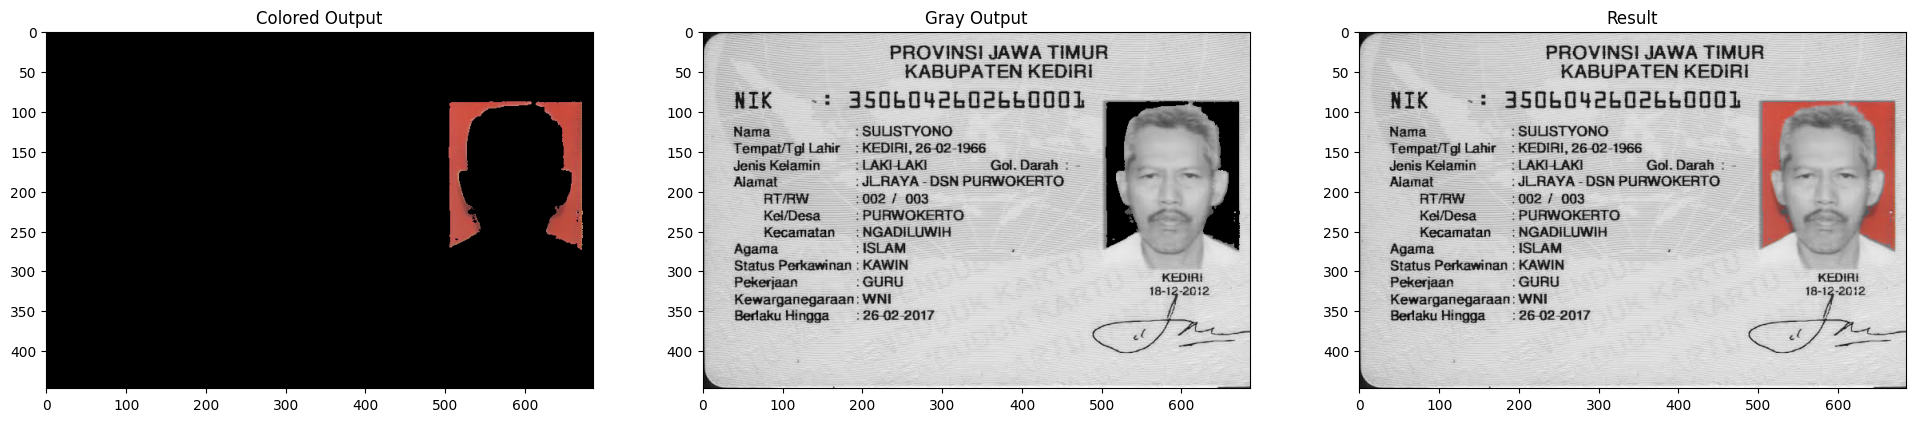

In [53]:

print('Menampilkan warna merah pada citra masukan dan mengubah bagian lain yang tidak berwarna biru menjadi grayscale')
print('--------------------------------------------')

img = cv.imread('/content/drive/MyDrive/PCVK/Week03/contoh_ktp2.jpeg')

# Ubah gambar dari BGR ke RGB
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Ubah gambar ke grayscale dan gabungkan channelnya
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.merge([gray, gray, gray])

# Ubah gambar ke ruang warna HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Tentukan batas untuk warna merah dalam ruang warna HSV
lower = np.array([0, 100, 100])
upper = np.array([10, 255, 255])

# Buat mask untuk warna merah
mask = cv.inRange(hsv, lower, upper)

# Ambil bagian merah dari gambar
colored_output = cv.bitwise_and(img, img, mask=mask)

# Ubah bagian non-merah menjadi grayscale
gray_output = cv.bitwise_and(gray, gray, mask=255-mask)

# Gabungkan bagian Merah
result = cv.add(colored_output, gray_output)

# Tampilkan gambar menggunakan matplotlib
plt.figure(figsize=(24, 16))

plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(colored_output, cv.COLOR_BGR2RGB))
plt.title('Colored Output')

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(gray_output, cv.COLOR_BGR2RGB))
plt.title('Gray Output')

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Result')

plt.show()